In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

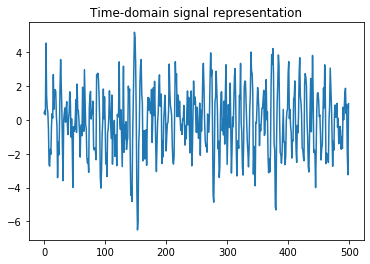

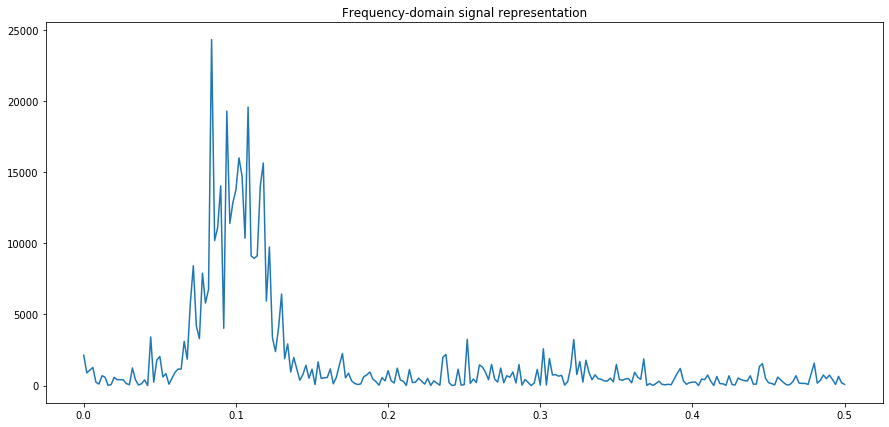

In [2]:
n_signal = 500
hz = np.linspace(0, 1, n_signal)
gx = np.exp(-(4 * np.log(2) * (hz - .1) / .1) ** 2) * n_signal / 2
raw_signal = np.real(np.fft.ifft(gx * np.exp(1j * np.random.rand(n_signal) * 2 * np.pi)))
raw_signal = raw_signal + np.random.randn(n_signal)

plt.plot(raw_signal)
plt.title('Time-domain signal representation')
plt.show()

plt.figure(figsize=(15, 7))
# 0.5 is nyquist frequency 
hz_axis = np.linspace(0, 0.5, int(np.floor(n_signal / 2) + 1))
plt.plot(hz_axis, abs(np.fft.fft(raw_signal)[:len(hz_axis)]**2))
plt.title('Frequency-domain signal representation')
plt.show()


Text(0.5, 1.0, 'filtered_signal')

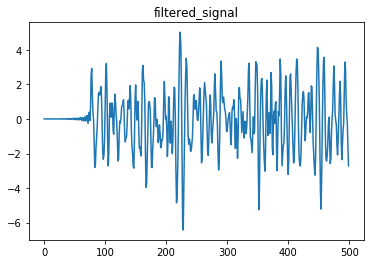

In [3]:
order = 150
# 0.6 here means 0.3 frequency from the chart above, low-pass filter
filtering_kernel = signal.firwin(order, 0.6)

filtered_signal = signal.lfilter(filtering_kernel, 1, raw_signal)
plt.plot(filtered_signal)
plt.title('filtered_signal')

Text(0.5, 1.0, 'filtered_signal_flipped_filtered')

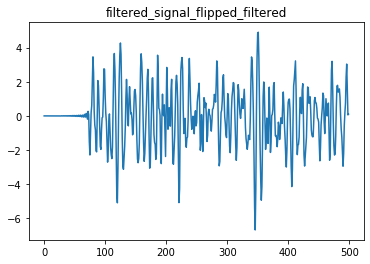

In [4]:
filtered_signal_flipped = filtered_signal[::-1]
plt.plot(filtered_signal_flipped)
plt.title('filtered_signal_flipped')

Text(0.5, 1.0, 'filtered_signal_flipped_filtered')

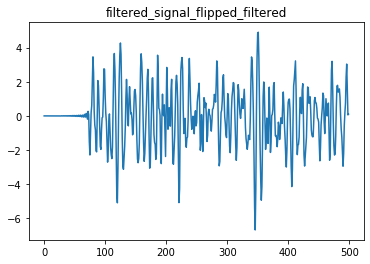

In [5]:
filtered_signal_flipped_filtered = signal.lfilter(filtering_kernel, 1, filtered_signal_flipped)
plt.plot(filtered_signal_flipped_filtered)
plt.title('filtered_signal_flipped_filtered')


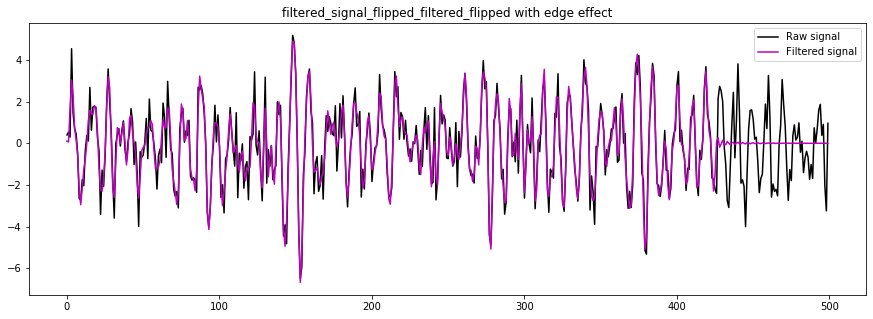

In [6]:
filtered_signal_flipped_filtered_flipped = filtered_signal_flipped_filtered[::-1]

plt.figure(figsize=(15, 5))
plt.plot(range(0, n_signal), raw_signal, 'k', label='Raw signal')
plt.plot(range(0, n_signal), filtered_signal_flipped_filtered_flipped, 'm', label='Filtered signal')
plt.title('filtered_signal_flipped_filtered_flipped with edge effect')
plt.legend()

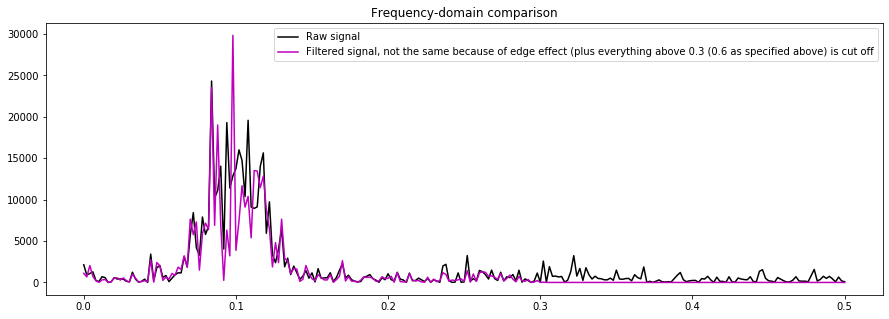

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(hz_axis, abs(np.fft.fft(raw_signal)[:len(hz_axis)] ** 2), 'k', label='Raw signal')
plt.plot(hz_axis, abs(np.fft.fft(filtered_signal_flipped_filtered_flipped)[:len(hz_axis)] ** 2), 'm',
         label='Filtered signal, not the same because of edge effect (plus everything above 0.3 '
               '(0.6 as specified above) is cut off')
plt.title('Frequency-domain comparison')
plt.legend()


# Using reflexion to deal with edge effect

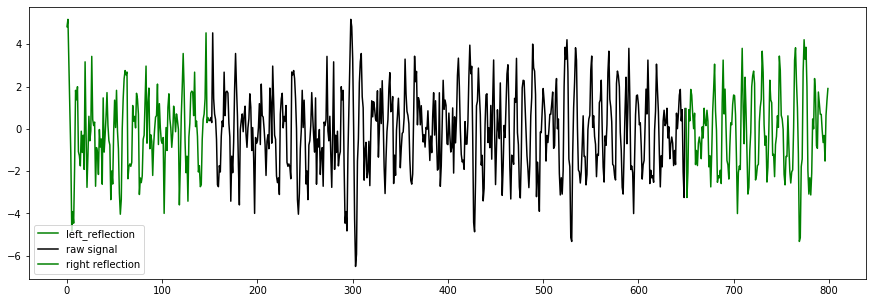

In [32]:
# USING REFLEXION TO DEAL WITH EDGE EFFECT

# Reflexion is based not on the whole signal, but only on order length (kernel length) as it is filtered
# later by this kernel
reflection_left = raw_signal[:order][::-1]
reflection_right = raw_signal[n_signal - order:][::-1]
raw_signal_reflected = np.concatenate((reflection_left, raw_signal, reflection_right), axis=0)

plt.figure(figsize=(15, 5))
plt.plot(range(0, order), reflection_left, 'g', label='left_reflection')
plt.plot(range(order, n_signal + order), raw_signal, 'k', label='raw signal')
plt.plot(range(n_signal + order, n_signal + order * 2), reflection_right, 'g', label='right reflection')
plt.legend()

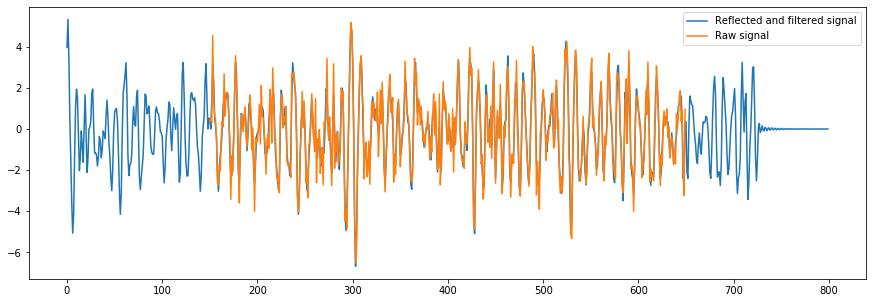

In [23]:
filtered_raw_signal_reflected_filtered = signal.lfilter(filtering_kernel, 1, raw_signal_reflected)
filtered_raw_signal_reflected_filtered_flipped = filtered_raw_signal_reflected_filtered[::-1]
filtered_raw_signal_reflected_filtered_flipped_filtered = signal.lfilter(
    filtering_kernel, 1, filtered_raw_signal_reflected_filtered_flipped)
filtered_raw_signal_reflected_filtered_flipped_filtered_flipped = \
    filtered_raw_signal_reflected_filtered_flipped_filtered[::-1]

plt.figure(figsize=(15, 5))
plt.plot(filtered_raw_signal_reflected_filtered_flipped_filtered_flipped,
         label='Reflected and filtered signal')
plt.plot(range(order, n_signal + order), raw_signal, label='Raw signal')
plt.legend()

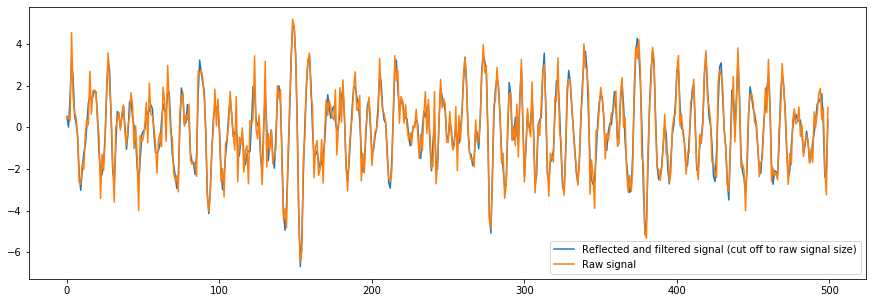

In [33]:
reflection_filtered_signal = \
    filtered_raw_signal_reflected_filtered_flipped_filtered_flipped[order:n_signal + order]

plt.figure(figsize=(15, 5))
plt.plot(reflection_filtered_signal, label='Reflected and filtered signal (cut off to raw signal size)')
plt.plot(raw_signal, label='Raw signal')
plt.legend()


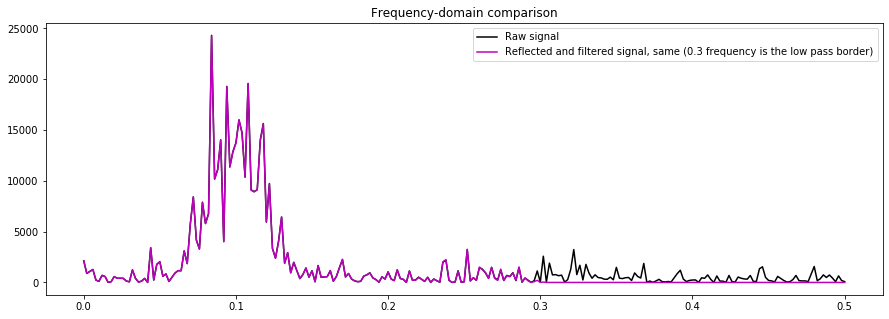

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(hz_axis, abs(np.fft.fft(raw_signal)[:len(hz_axis)] ** 2), 'k', label='Raw signal')
plt.plot(hz_axis, abs(np.fft.fft(reflexion_filtered_signal)[:len(hz_axis)] ** 2), 'm',
         label='Reflected and filtered signal, same (0.3 frequency is the low pass border)')
plt.title('Frequency-domain comparison')
plt.legend()


# Using built in function to perform everything above automatically

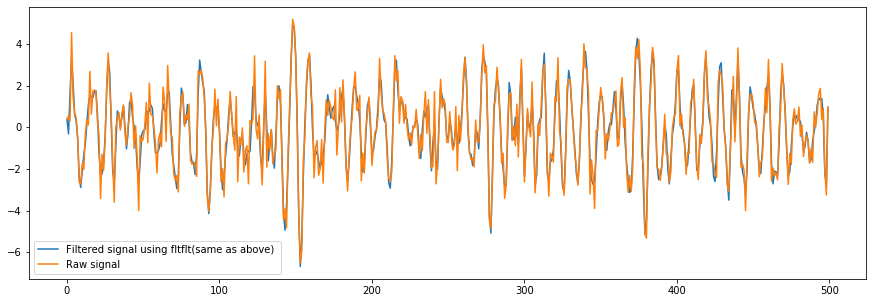

In [34]:
# Using built in function to perform everything above automatically
plt.figure(figsize=(15, 5))
plt.plot(signal.filtfilt(filtering_kernel, 1, raw_signal),
         label='Filtered signal using fltflt(same as above) ')
plt.plot(raw_signal, label='Raw signal')
plt.legend()
